# FloyHub introduction to Deep Learning: Linear Regression

### Abstract
It’s Time to fire up the torch, we will cover the basic concept of ML to solve the hello world of ML: predict house estimation given square feet. Then we move on another classical: the handwritten digit recognition with Logistic Regression. *It’s ML time*.

## Introduction
We are going to solve an overly simple, and unrealistic problem, which has the upside of making understanding the concepts of ML and PyTorch easy. We want to predict a single scalar outcome, house price (in $) based on a single feature, house size (in square meters, sqm). This eradicates the need to handle multi-dimensional data, enabling us to focus solely on defining a model, implementing, and training it in PyTorch.

### Table of Contents

- ML Hello World
- Collect a Dataset
- Choose a Model (sub paraghaps)
- Train
- Evaluate
- Summary

## The ML Hello World

We start with a set of data points that we have collected (chart below), each representing the relationship between two values —an outcome (house price) and the influencing feature (house size).

![img - dataset](https://cdn-images-1.medium.com/max/1280/1*wcivD-w2dNHR7L3JUKwbhQ.png)

However, we cannot predict values for features that we don’t have data points for (chart below)

![img - how can we predict a new value given sqm](https://cdn-images-1.medium.com/max/1280/1*GH-vC3HDd01UFjjjCVMQlA.png)

We can use ML to discover the relationship (the ‘best-fit prediction line’ in the chart below), such that given a feature value that is not part of the data points, we can predict the outcome accurately (the intersection between the feature value and the prediction line.

![img - how can we predict a new value given sqm - visual solution](https://cdn-images-1.medium.com/max/1280/1*LMIk7UyRhz4ObI2FWX_75Q.png)

## Collect a Dataset

One of the most time and resource consuming task of every ML/DL workflow is to collect [high quality] dataset. What can we do? Well first of all you can Explore our datasets, otherwise you can search throught Internet. 
Luckily Kaggle has provided a great dataset of sold houses in King County from May 2014 to 2015, we have already uploaded it for you so that you can immediatly start to play.

Let’s take a look about this dataset:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# The dataset is mounted in the /input path
data = pd.read_csv("/input/kc_house_data.csv")
# Return the first n=5 rows
data.head(n=5)

21613

In [7]:
# Describe our Dataset with some stats
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Our main focus is trying to predict the price given the squarefeet. (You are free to make experiment on the other features)

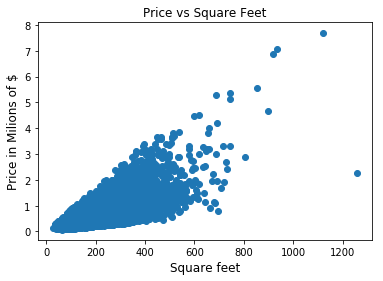

In [27]:
# Now let's plot Square Feet vs Price
# If you are European or want to reason in square meters: multiply sqft * 0.092903
plt.scatter(x=data.sqft_living, y=data.price/1e6)
plt.ylabel('Price in Milions of $', fontsize=12)
plt.xlabel('Square feet', fontsize=12)
plt.title("Price vs Square Feet")

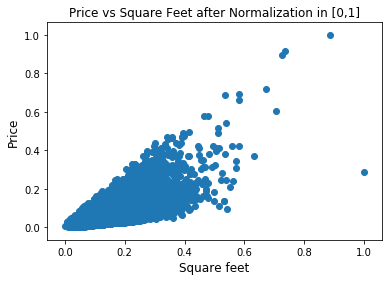

In [51]:
def dataset_normalization(ds):
    # Normalize data in [0,1] range
    # new_x = (x - min)/(max - min) 
    min = ds.min()
    max = ds.max()
    return (ds - min)/(max - min)

data['price'] = dataset_normalization(data['price'])
data['sqft_living'] = dataset_normalization(data['sqft_living'])

# Let's Plot the Dataset after normalization
plt.scatter(x=data.sqft_living, y=data.price)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Square feet', fontsize=12)
plt.title("Price vs Square Feet after Normalization in [0,1]")

In [54]:
from torch.utils.data.dataset import Dataset
import torch.utils.data.DataLoader

class Sqft2Price(Dataset):
    def __init__(self):
        self.data = pd.read_csv("/input/kc_house_data.csv")
        self.train = data['sqft_living']
        self.label = data['price']
        
    def __getitem__(self, index):
        # Return (train_sample, labels)
        return (self.train[index], self.label[index])

    def __len__(self):
        return len(self.data.index) # how many examples you have

loader = DataLoader(Sqft2Price(), batch_size=1, shuffle=False)

for i, (input, target) in enumerate(loader):
    if i < 10:
        print (i, input, target)
    else:
        break


ImportError: No module named 'torch'

## Choose a Model

To do prediction using ML, we need to choose a model that can best-fit the data that we have collected.
We can choose a linear (straight line) model, and tweak it to match the data points by changing its steepness/gradient and position. 

![img Linear Model visual](https://cdn-images-1.medium.com/max/1280/1*i8a-ADvmchTek5y9mWiImA.png)

We can also choose an exponential (curve) model, and tweak it to match the same set of data points by changing its curvature and position.

![img Curve Model visual](https://cdn-images-1.medium.com/max/1280/1*9aaM2_rUeMUkknRdoIDXFw.png)

Here's how to define a Linear Model in PyTorch.

In [ ]:
# Linear Regression Model
class LinearRegression(nn.Module):
    # Template for LR
    def __init__(self, input_size, output_size, bias_bool):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=bias_bool)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Define a Linear Model with 1 feature(weight/variable) and bias, and output a single number
# w * sqft + bias = price, we are learning the w and bias
model = LinearRegression(input_size=1, output_size=1, bias_bool=True)

# If you are running a GPU instance, load the model on GPU
if cuda:
    model.cuda()

## Cost Function

To compare which model is a better-fit more rigorously, we define best-fit mathematically as a cost function that we need to minimize. An example of a cost function can simply be the absolute sum of the differences between the actual outcome represented by each data point, and the prediction of the outcome (the vertical projection of the actual outcome onto the best-fit line). Graphically the cost is depicted by the sum of the length of the blue lines in the chart below.

![img cost function visual](https://cdn-images-1.medium.com/max/1280/1*QaFrGv6YU357T97i5KcZgg.png)

**NOTE**: More accurately the cost function is often the squared of the difference between actual and predicted outcome, because the difference can sometimes can be negative; this is also known as min least-squared.

![Code PyTorch Setup loss function]()

In [ ]:
# Use the Mean Squared Error Loss Function, MSE = (sum_over_n(pred - label)^2)/n where n are the number of samples 
loss_fn = torch.nn.MSELoss(size_average=True)

# If you are running a GPU instance, compute the loss on GPU
if cuda:
    loss_fn.cuda()

## Gradient Descent

If you are on an expansive plateau in the mountains, when trying to descent to the lowest point, your viewpoint looks like this.

![mountain landscape](https://cdn-images-1.medium.com/max/1280/1*phKkGIPjF1_inKf46KF7EA.png)

The direction of descent is not obvious! The best way to descend is then to perform **gradient descent**:

- Determine the direction with the steepest downward gradient at current position
- Take a step of size X in that direction
- Repeat & rinse; this is known as training

Minimizing the cost function is similar because, the cost function is undulating like the mountains (chart below), and we are trying to find the minimum point, which we can similarly achieve through gradient descent.

![gsd](https://cdn-images-1.medium.com/max/1280/1*grA_mOjJddRb7kmvayMrWQ.png)

[Code PyTorch Setup SGD]


In [34]:
# Define SGD Optimizer
learning_rate = 1e-5
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

1e-05


## Train

[code PyTorch Training both CPU and CUDA]

In [ ]:
# Hyper Parameters
#input_size = 1
#output_size = 1
num_epochs = 10
#learning_rate = 1e-5 # 0.00001

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))

## Evaluate

[code PyTorch Evaluate]

## What if we had more features?

Visualization - Training and Eval as before

## Do you want more?

Introduce the next step, handwritten classification task

## Summary

Encourage exploration and brief summary